In [43]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("bank_churn.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


- Average age of customers is approximately 39 years old
- Follow up on the previous point, average salary is about 100k. I wonder what currency this is considering that it is in three different countries or if it has been converted to USD **(Let's assume it's USD)**
- On average, churn rate is about 20% (considering that churn is a binary feature)
- Value counts of every feature match, which means there aren't any missing values in this data set
- Max tenure of the customers of this dataset is 10 years, but on average the tenure is 5 years. This seems like a really short time considering the age range of the customers.

In [5]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [6]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

- As I suspected, there are no missing values in any of the columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df["country"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

- The countries for this dataset are from **France, Germany, and Spain**. How does this impact our analysis?

In [9]:
df.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

- The gender distribution is almost split evenly

In [10]:
df.duplicated().sum()

0

- There are no duplications in the dataset either, so the dataset is pretty clean to move onto visualizations

<AxesSubplot:>

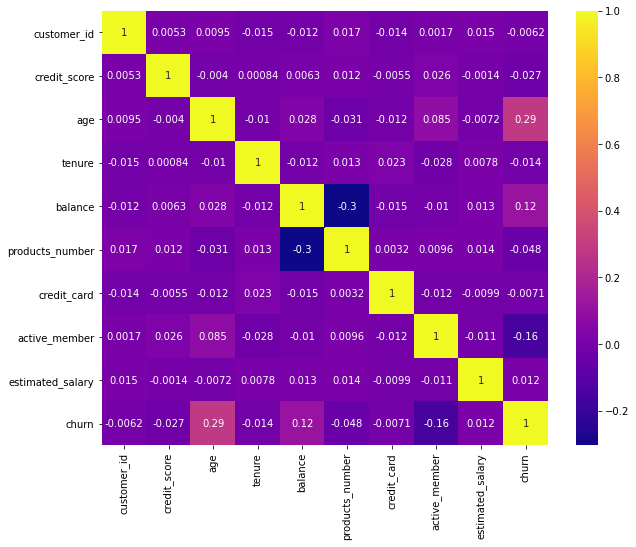

In [11]:
#Visualizing correlations between the features using a heatmap
corr = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cbar=True, cmap='plasma')

- The top three most **positively correlated** values are:
    - **age vs. churn:** 0.29
    - **balance vs. churn:** 0.12
    - **age vs. active_member:** 0.085


- The two most **negatively correlated** values are:
    - **balance vs. product_numbers:** -0.3
    - **active_member vs. churn:** -0.16

<AxesSubplot:xlabel='tenure', ylabel='Count'>

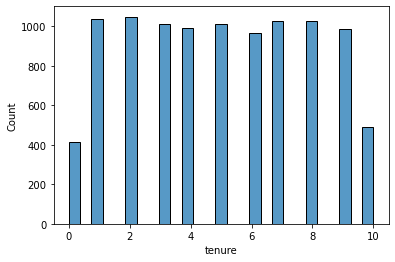

In [12]:
sns.histplot(df['tenure'])

<AxesSubplot:xlabel='country', ylabel='Count'>

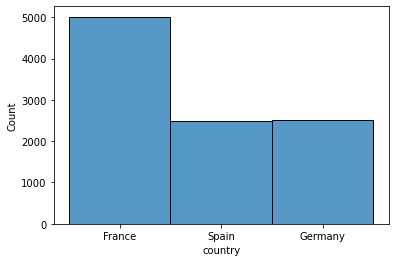

In [13]:
sns.histplot(df['country'])

<AxesSubplot:xlabel='balance', ylabel='Count'>

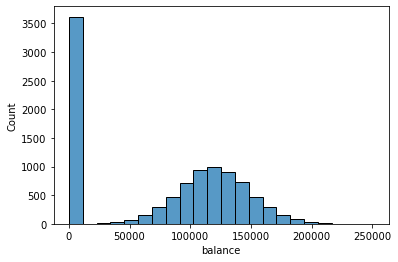

In [14]:
sns.histplot(df['balance'])

- Most people have a balance of 0 maybe 20% of the people who churn come from this category

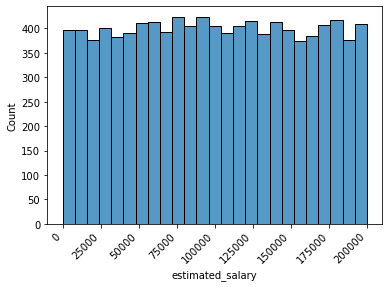

In [15]:
sns.histplot(df['estimated_salary'], bins=25)
plt.xticks(rotation=45, ha='right');

C:\Users\sashahid\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

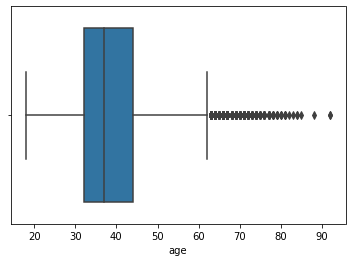

In [16]:
sns.boxplot(df['age'])

In [17]:
from sklearn.model_selection import train_test_split

In [21]:
#Encoding categorical labels for modelling

from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['country'] = LabelEncoder().fit_transform(df['country'])

X = df.drop(['customer_id','churn'], axis=1)
y = df['churn']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Standardize x_train and x_test values for modelling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [39]:
#Model Training for Logistic Regression, Decision Tree, and Random Forest

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble  import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score

#Creating a dictionary of models with their names
models = {'Logistic Regression':LogisticRegression(), 
          'Decision Tree':DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy : {accuracy_score(y_test,y_pred)} ")

Logistic Regression Accuracy : 0.8155 
Decision Tree Accuracy : 0.7815 
Random Forest Accuracy : 0.8655 


- According to what we found, amongst the three models Random Forest Classifier has the highest accuracy. While it isn't as close to 1 it is a reasonable value of at least 85% accuracy for our model

In [45]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = model.predict(X_test)


def prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary]])
    features = sc.fit_transform(features)
    prediction = rf.predict(features).reshape(1,-1)
    return prediction[0]

In [46]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [49]:
credit_score = 699
country = 0
gender = 0
age= 39
tenure= 1
balance = 0.00
products_number= 2
credit_card = 0
active_member = 0
estimated_salary = 93826.63

pred  = prediction(credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary)

if pred == 1:
    print("No longer a bank customer")
else:
    print("Still a bank customer")

Still a bank customer
